In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyflux as pf
import numpy as np
import random

%matplotlib inline

# Handy reference: https://pyflux.readthedocs.io/en/latest/arima.html

In [2]:
df_air_all = pd.read_csv('./../data/restaurant/air_visit_data.csv')
df_air_all.rename(columns = {'visit_date' : 'date'}, inplace = True)
df_air_date_mean = df_air_all.groupby(df_air_all.date).mean()

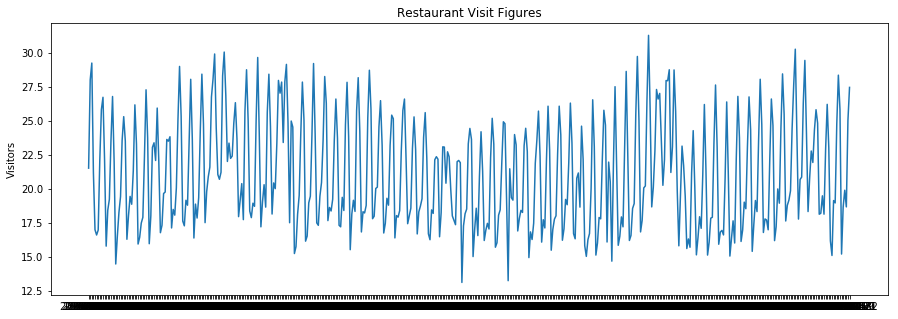

In [3]:
plt.figure(figsize=(15,5))
#plt.plot(df_air_all.index,df_air_all['visitors'])
plt.plot(df_air_date_mean.index,df_air_date_mean['visitors'])
plt.ylabel('Visitors')
plt.title('Restaurant Visit Figures');

In [4]:
model = pf.ARIMA(data=df_air_date_mean, ar=4, ma=4, target='visitors', family=pf.Normal())

In [5]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: visitors                            Method: MLE                                       
Start Date: 2016-01-05                                  Log Likelihood: -1085.7624                        
End Date: 2017-04-22                                    AIC: 2191.5248                                    
Number of observations: 474                             BIC: 2233.1369                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 21.2499    2.5709     8.2655   0.0      (16.2109 | 26.2889)      
AR(1)                                

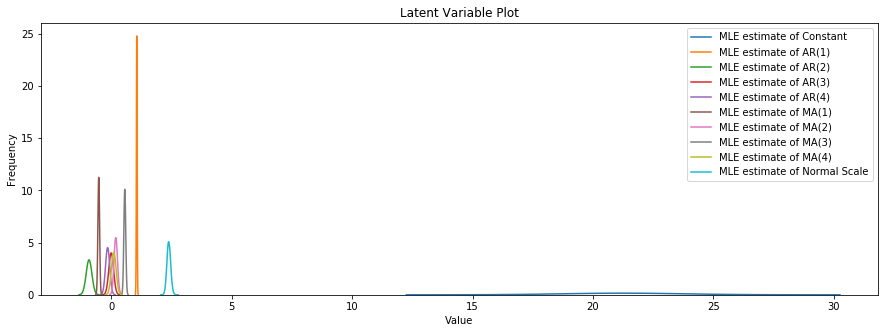

In [6]:
model.plot_z(figsize=(15,5))

In [7]:
model.plot_fit(figsize=(15,10))

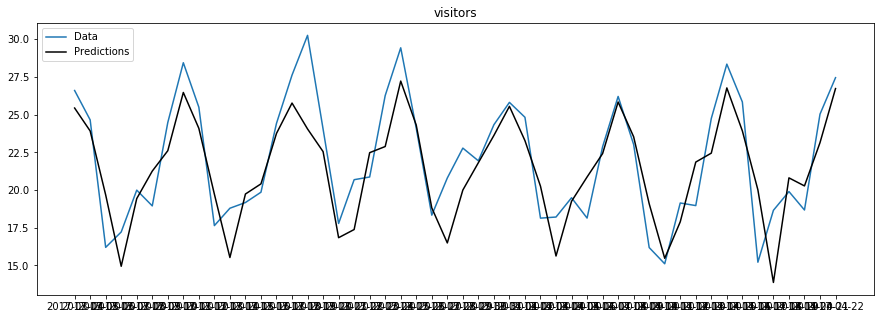

In [8]:
model.plot_predict_is(h=50, figsize=(15,5))

In [9]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))